## Qué hay acá?

Tomando los datos de 0_raw en la carpeta data genero una nube de palabras en la carpeta 2_processed.

In [22]:
import pandas as pd

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TELMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df = pd.read_excel('../data/0_raw/0_raw.xlsx')
df.head()

,texto-traducido,texto-original
0,Poor #MasistasIgnorantes think that because t...,Pobres #MasistasIgnorantes piensan que por and...
1,Poor #MasistasIgnorantes think that because t...,Pobres #MasistasIgnorantes piensan que por and...
2,Poor #MasistasIgnorantes think that because t...,Pobres #MasistasIgnorantes piensan que por and...
3,@DraInterleucina @LuisFerCamachoV @Elgobernad...,@DraInterleucina @LuisFerCamachoV @Elgobernado...
4,The tongo was always evil. He ordered his fat...,El tongo siempre fue maleante. Mandó a desvali...


In [12]:
df = df["texto-original"]

# drop duplicates
df = df.drop_duplicates()

print(df.shape)
df.head()

(36,)


0    Pobres #MasistasIgnorantes piensan que por and...
3    @DraInterleucina @LuisFerCamachoV @Elgobernado...
4    El tongo siempre fue maleante. Mandó a desvali...
5    Así justifica lo tan obvio 🙄como su supuesto a...
7                           @grupoeldeber #revocatongo
Name: texto-original, dtype: object

In [14]:
# lower case and remove punctuation
df = df.str.lower().str.replace('[^\w\s]','')
df.head()

C:\Users\TELMA\AppData\Local\Temp\ipykernel_11236\4027811480.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.str.lower().str.replace('[^\w\s]','')


0    pobres masistasignorantes piensan que por anda...
3    drainterleucina luisfercamachov elgobernadorlf...
4    el tongo siempre fue maleante mandó a desvalij...
5    así justifica lo tan obvio como su supuesto au...
7                             grupoeldeber revocatongo
Name: texto-original, dtype: object

In [15]:
for i in range(df.shape[0]):
    try:
        while '\n' in df.iloc[i]:
            df.iloc[i].text = df.iloc[i].text.replace('\n', ' ')
        while '\t' in df.iloc[i]:
            df.iloc[i].text = df.iloc[i].text.replace('\t', ' ')
    except:
        pass

df.head()

0    pobres masistasignorantes piensan que por anda...
3    drainterleucina luisfercamachov elgobernadorlf...
4    el tongo siempre fue maleante mandó a desvalij...
5    así justifica lo tan obvio como su supuesto au...
7                             grupoeldeber revocatongo
Name: texto-original, dtype: object

In [20]:
stop_words = stop_words + ['rt', 'si', 'ser', 'q', 'tan', ',', '.', 'http', 'https', 't', 'co']

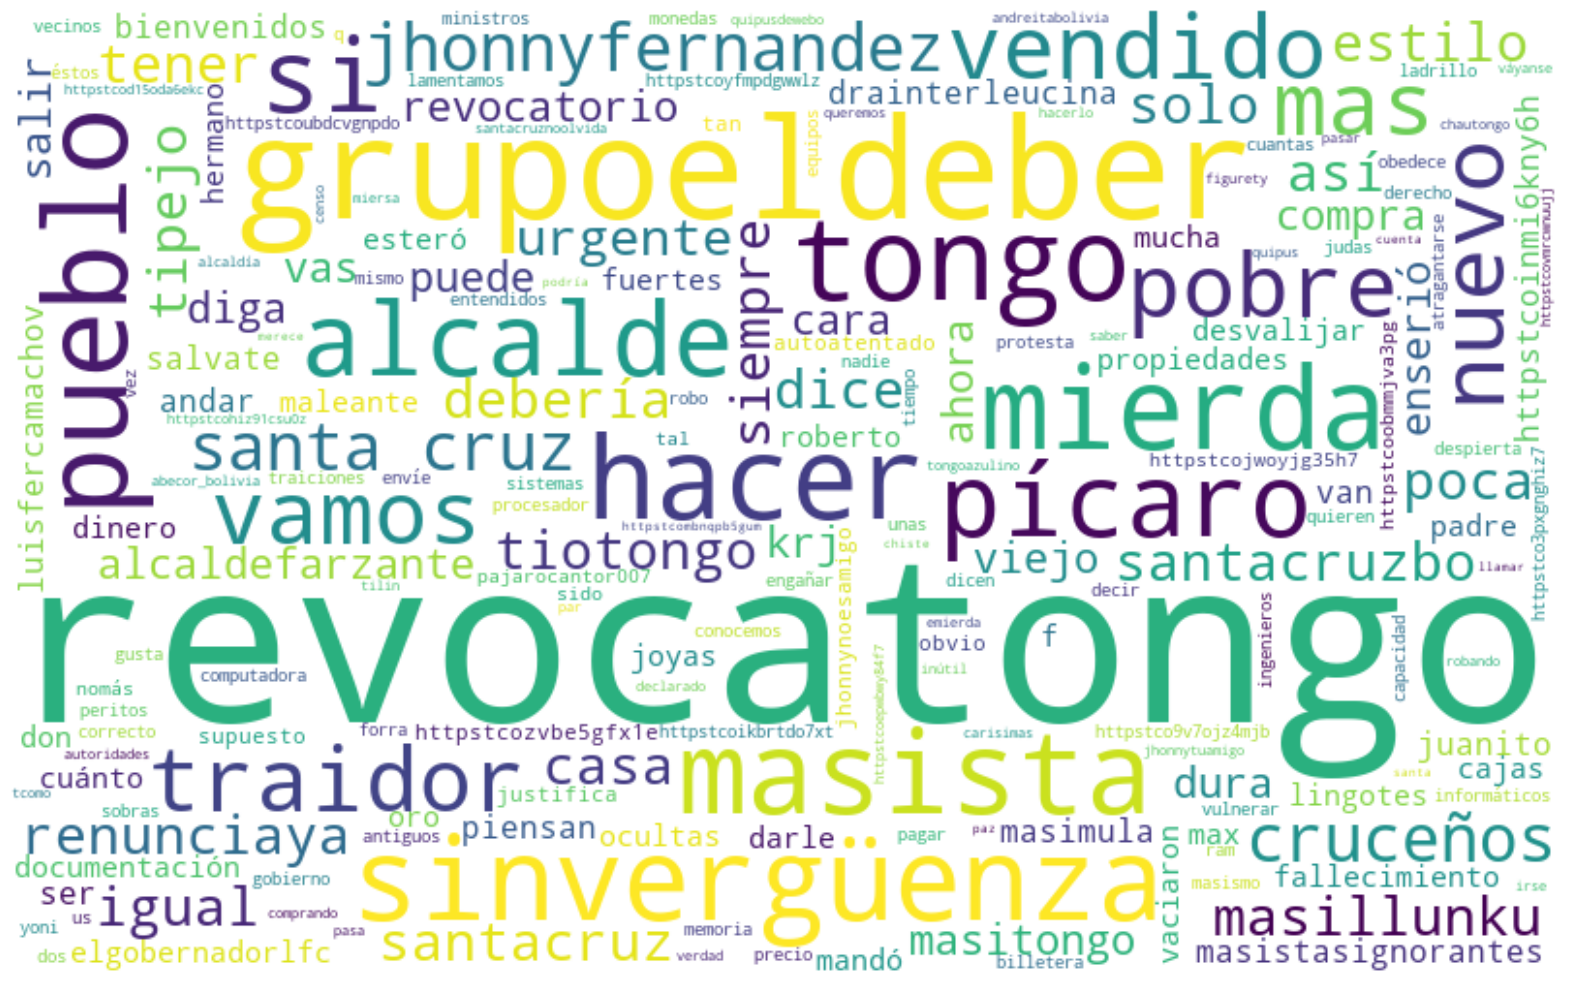

In [24]:
wordcloud = WordCloud(width=800,
                    height=500,
                    background_color ='white',
                    stopwords=stop_words,
                    random_state=21,
                    max_font_size=150).generate(' '.join(df))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
# export plot as png
wordcloud.to_file('../reports/figures/wordcloud.png')